In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm


ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('brine')
model_names

['Li_18_1%plg_brine',
 'Li_18_25%plg_brine',
 'Li_18_10%plg_brine',
 'Li_18_3%alb_brine',
 'Li_18_10%alb_brine']

# Exploring Pyrrhenious's Brine Models Database Correspondence

Here we look at Plagioclaise models parameterization correspondence of:

  * Li et al. 2018. Electrical conductivity of the plagioclase–NaCl–water system and its implication for the high conductivity anomalies in the mid-lower crust of Tibet Plateau
 


## Li et al. 2018

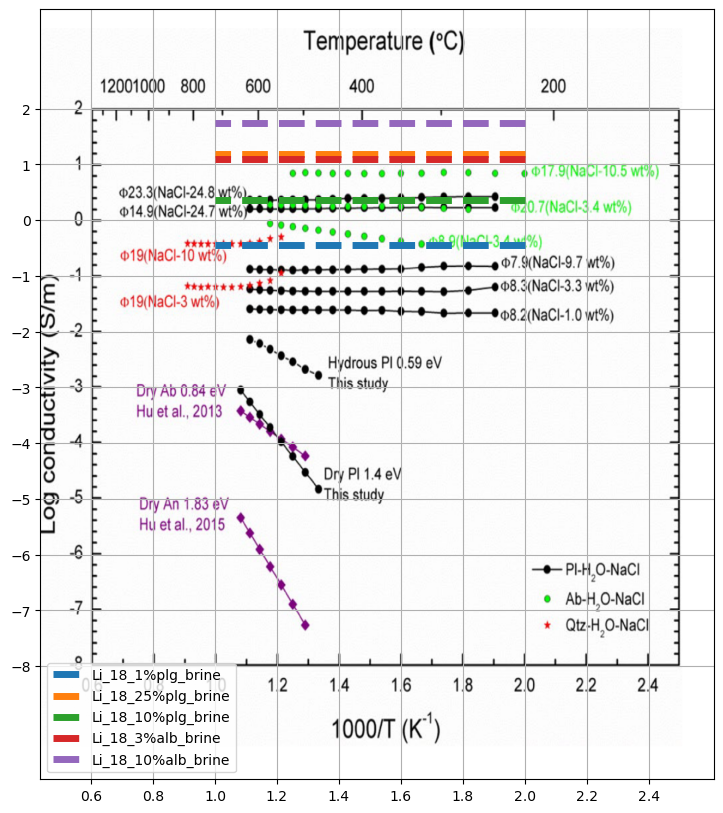

In [2]:
model = 'Li_18_1%plg_brine'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(500,1000,num=100,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in ecdatabase.get_model_list_for_phase('brine'):
        conductivity = ecdatabase.get_model(model_name).get_conductivity(T=temperature_range)
        ax.plot(1e3/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5,label=model_name)
    plt.legend()
    break
    
